<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>7. MLR</b></u>
</div>

<div style="text-align: center; font-size: 30px; color: Violet;">
    <u><b>EXPLORATORY DATA ANALYSIS ON A DATASET</b></u>
</div>

## Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
## Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs
## Taskes:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [55]:
# Load data
df=pd.read_csv("ToyotaCorolla - MLR.csv")


In [56]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [57]:
#Statistical summary
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [58]:
# Drop Column Cylinders
df=df.drop(columns=['Cylinders'])

In [59]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [60]:
#One Hot encoding
df=pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [61]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,5,1015,False,True


In [62]:
# Handling outlier in column 'cc'
df['cc']=df['cc'].apply(lambda x: min(x,5000))

In [63]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,5,1015,False,True


In [64]:
# Split feature and target
x=df.drop(columns='Price')
y=df['Price']

In [65]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,5,1165,True,False
1,23,72937,90,0,2000,3,5,1165,True,False
2,24,41711,90,0,2000,3,5,1165,True,False
3,26,48000,90,0,2000,3,5,1165,True,False
4,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,5,1025,False,True
1432,72,19000,86,0,1300,3,5,1015,False,True
1433,71,17016,86,0,1300,3,5,1015,False,True
1434,70,16916,86,0,1300,3,5,1015,False,True


In [66]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

Price


<Figure size 600x400 with 0 Axes>

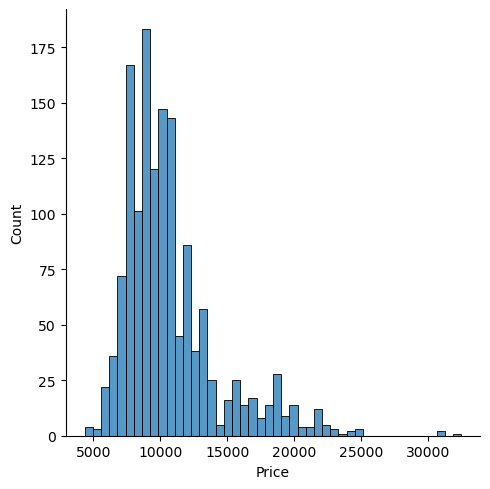

Age_08_04


<Figure size 600x400 with 0 Axes>

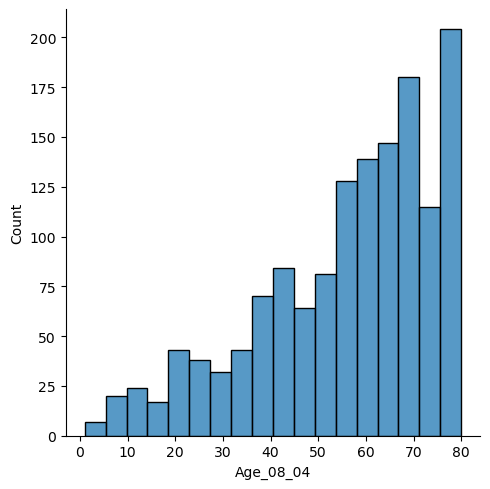

KM


<Figure size 600x400 with 0 Axes>

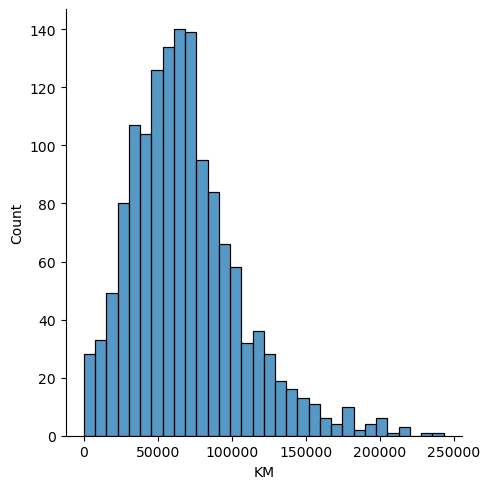

HP


<Figure size 600x400 with 0 Axes>

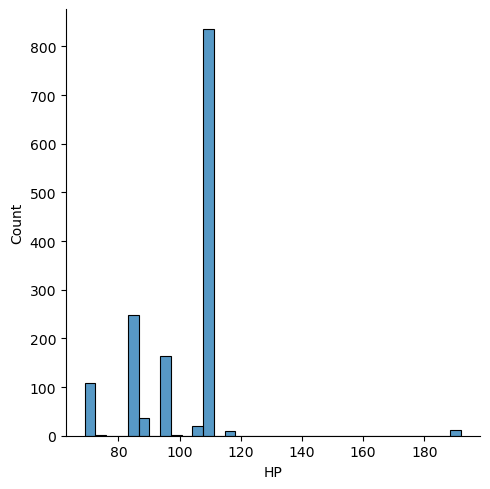

Automatic


<Figure size 600x400 with 0 Axes>

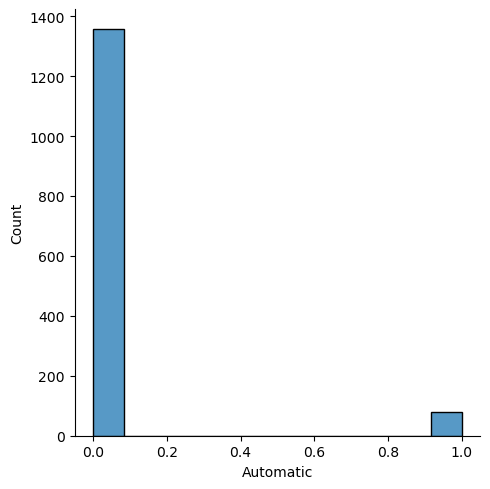

cc


<Figure size 600x400 with 0 Axes>

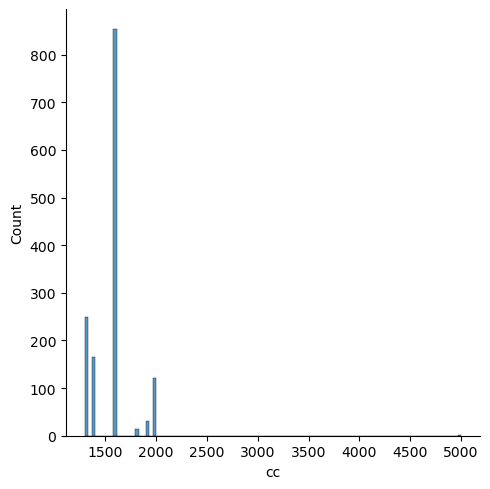

Doors


<Figure size 600x400 with 0 Axes>

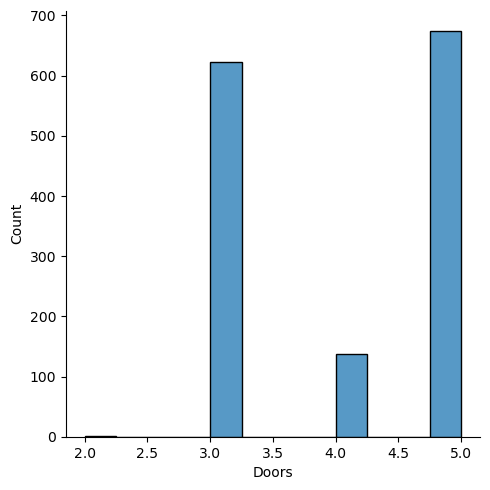

Gears


<Figure size 600x400 with 0 Axes>

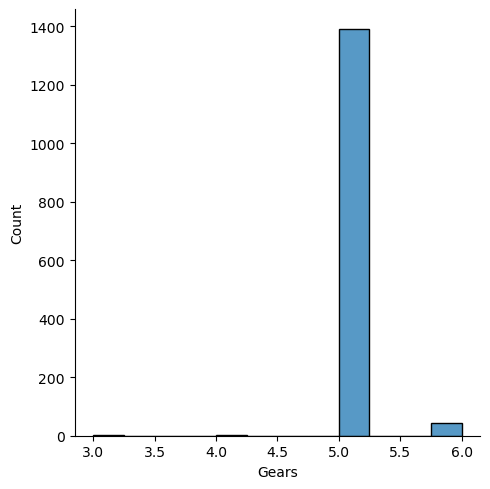

Weight


<Figure size 600x400 with 0 Axes>

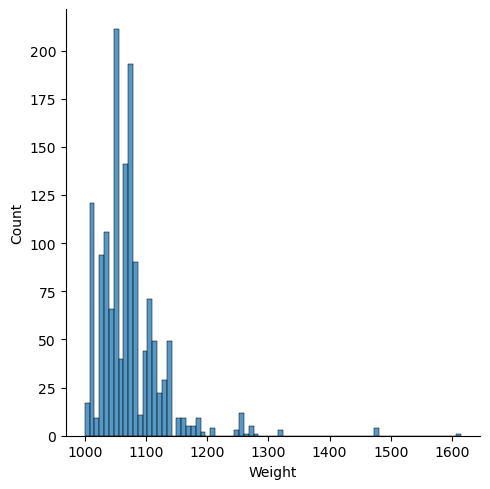

Fuel_Type_Diesel


<Figure size 600x400 with 0 Axes>

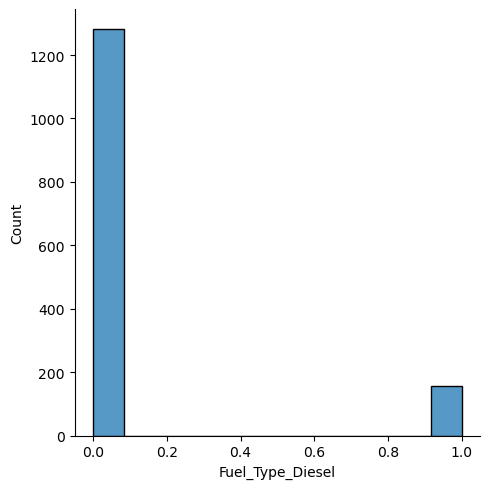

Fuel_Type_Petrol


<Figure size 600x400 with 0 Axes>

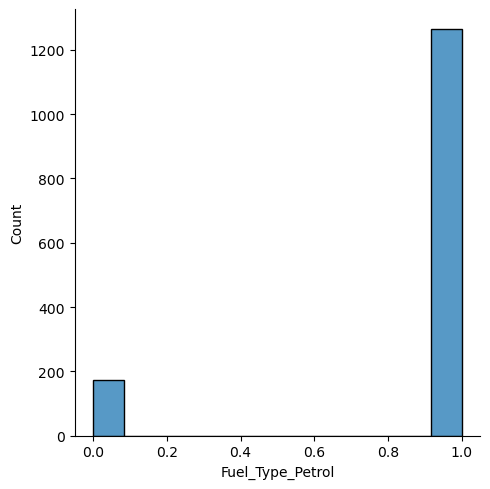

In [67]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    print(i)
    plt.figure(figsize=(6,4))
    sns.displot(df[i])
    plt.show()

Price


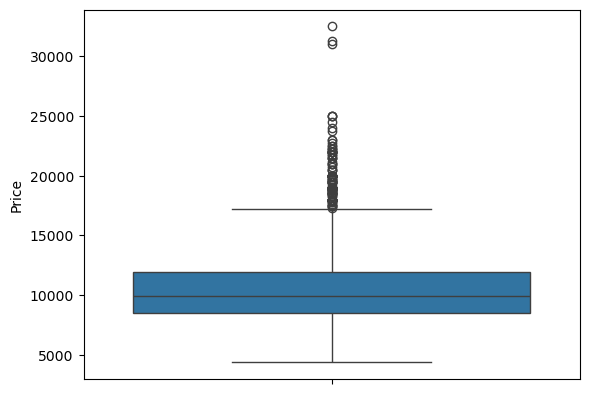

Age_08_04


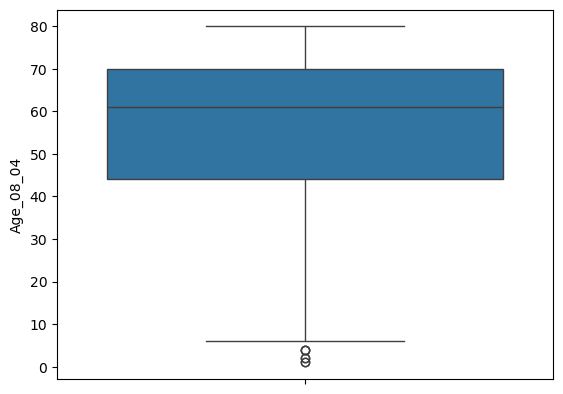

KM


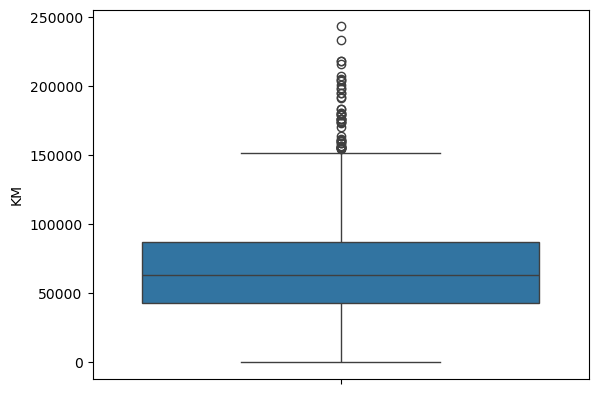

HP


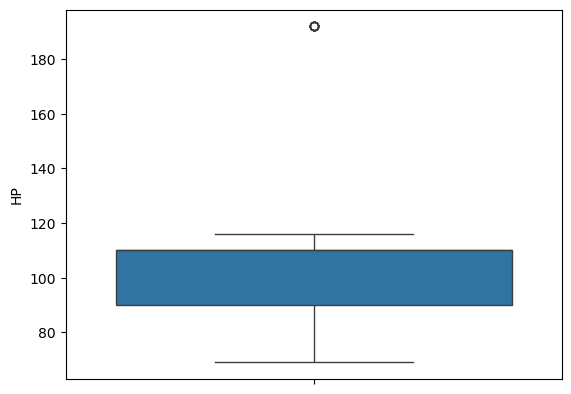

Automatic


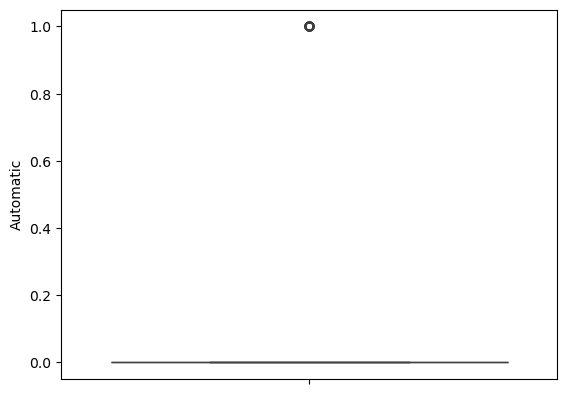

cc


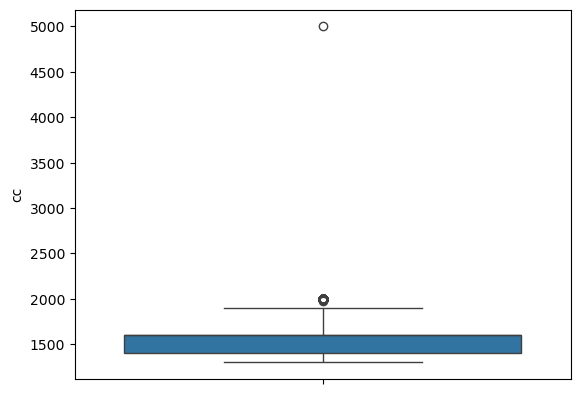

Doors


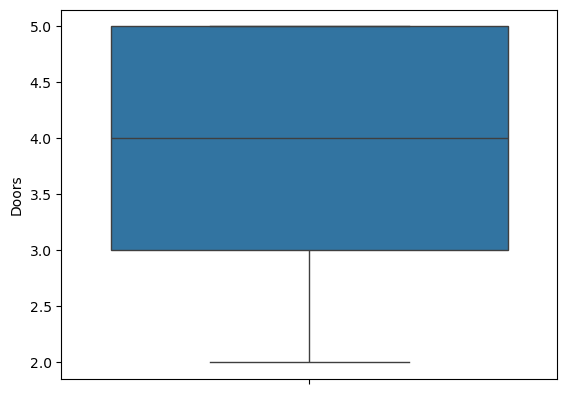

Gears


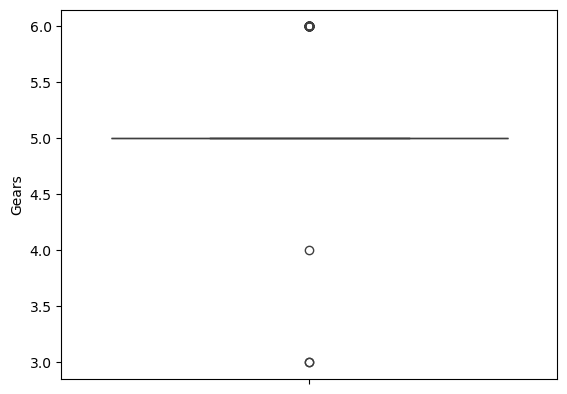

Weight


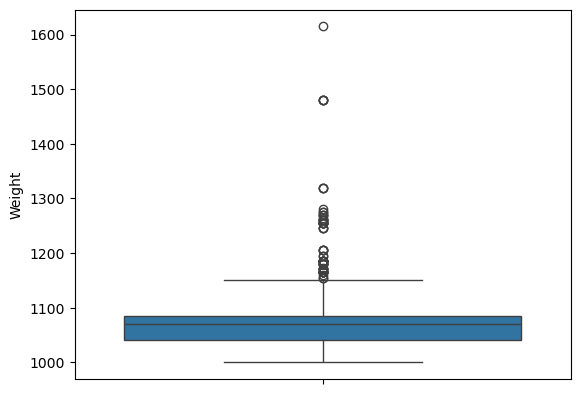

Fuel_Type_Diesel


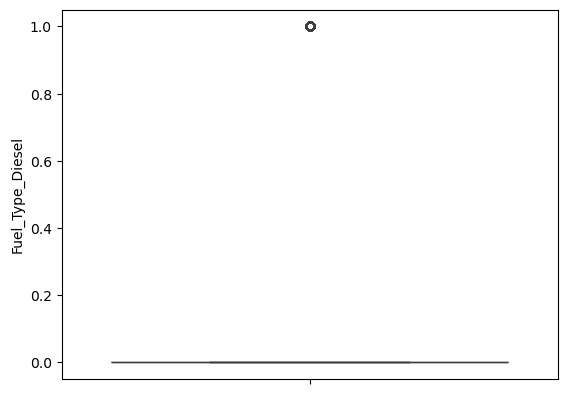

Fuel_Type_Petrol


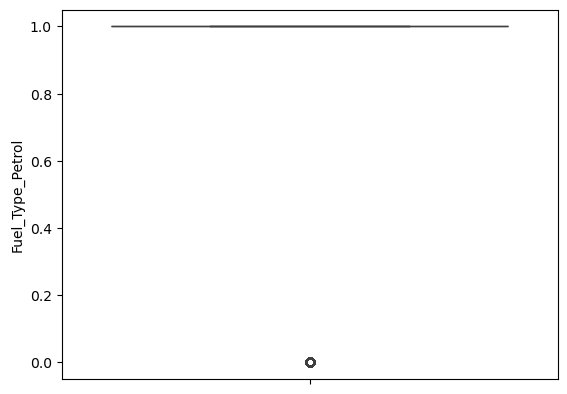

In [68]:
#Boxplot
for i in df.columns:
    print(i)
    sns.boxplot(df[i])
    plt.show()

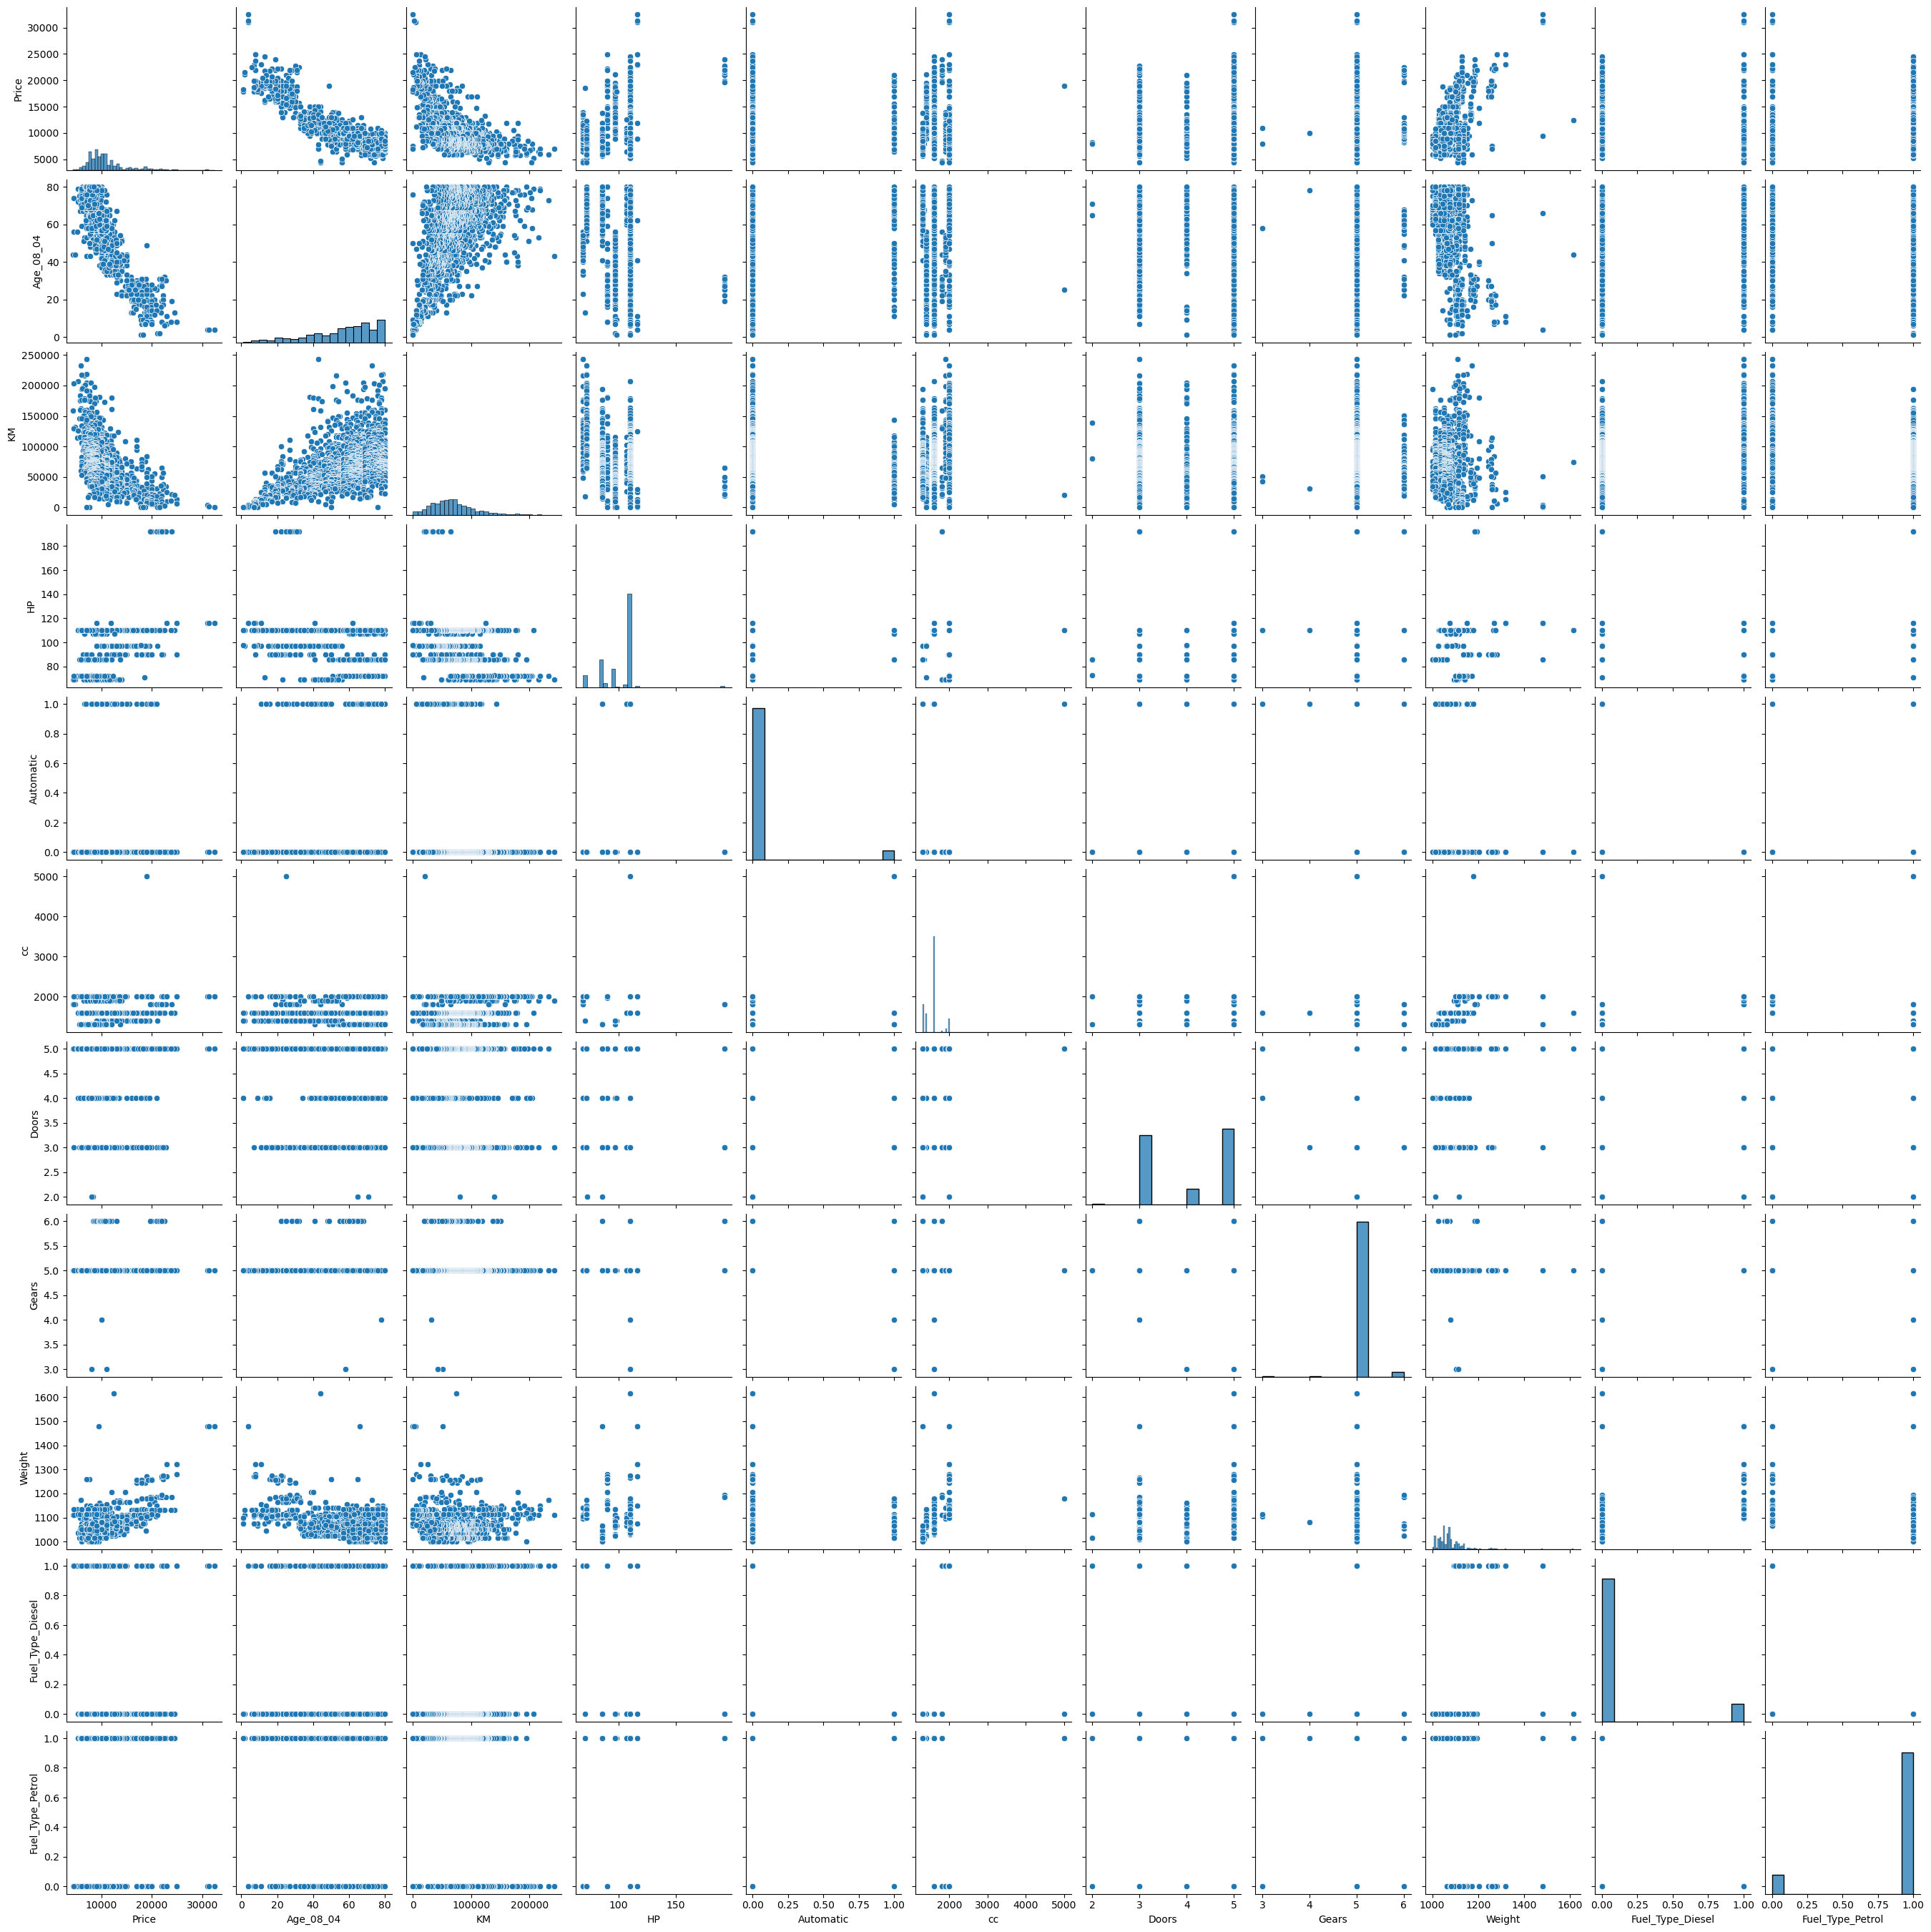

In [69]:
sns.pairplot(df)

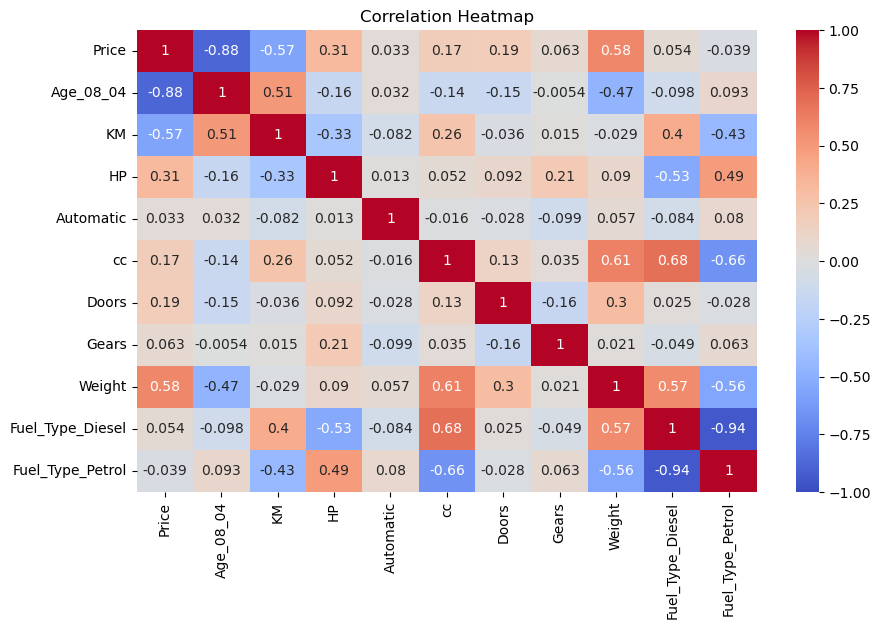

In [70]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [71]:
#Train-test split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)



In [72]:
#Feature scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [73]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#Model 1: Linear Regression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)


In [75]:
#Model 2: Ridge Regression
model_ridge=Ridge(alpha=1.0)
model_ridge.fit(x_train_scaled,y_train_scaled)
y_pred_ridge=model_ridge.predict(x_test_scaled)

In [76]:
#Model 3: Lasso Regression
model_lasso=Lasso(alpha=0.1)
model_lasso.fit(x_train_scaled,y_train_scaled)
y_pred_lasso=model_lasso.predict(x_test_scaled)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
#Evaluate all model
results=pd.DataFrame({'Model': ['Linear Regression','Lasso Regression', 'Ridge Regression'], 
                      'Mean Squared Error':[mean_squared_error(y_test,y_pred_lr),mean_squared_error(y_test,y_pred_lasso),mean_squared_error(y_test,y_pred_ridge)],
                      'R^2':[r2_score(y_test,y_pred_lr),r2_score(y_test,y_pred_lasso),r2_score(y_test,y_pred_ridge)]
                     })

In [78]:
# Show Permormace Matrix
print('Model Performance:\n')
print(results)

Model Performance:

               Model  Mean Squared Error       R^2
0  Linear Regression        2.163241e+06  0.837872
1   Lasso Regression        2.163565e+06  0.837848
2   Ridge Regression        2.161796e+06  0.837980


In [79]:
#Coefficient for all models
coefficients=pd.DataFrame({
    'Feature':x.columns,
    'Linear':model_lr.coef_,
    'Lasso':model_lasso.coef_,
    'Ridge':model_ridge.coef_
})
print('Model Coefficients:')
print(coefficients)

Model Coefficients:
            Feature       Linear        Lasso        Ridge
0         Age_08_04  -120.665955 -2264.120271 -2261.860793
1                KM    -0.016037  -604.383037  -606.050087
2                HP    20.327977   300.910940   301.782549
3         Automatic   194.304001    44.714329    44.923112
4                cc    -0.760198  -162.938282  -162.721052
5             Doors   -51.589675   -49.099144   -48.461856
6             Gears   538.195321   106.668994   106.851281
7            Weight    25.804184  1312.807944  1310.882160
8  Fuel_Type_Diesel   414.041758   128.761838   127.878302
9  Fuel_Type_Petrol  1357.741351   452.232277   448.734896


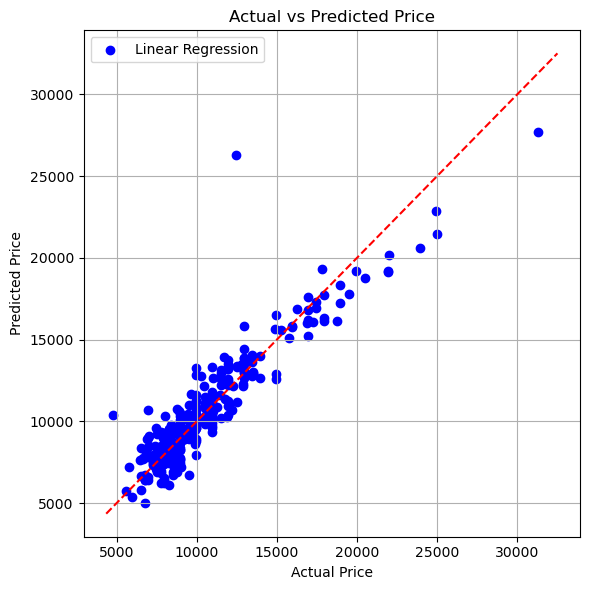

In [80]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## SUMMARY

THIS MODEL PREDICTS TOYOTA COROLLA PRICE USING THE GIVEN FEATURES WITH HIGH ACCURACY.

# INTERVIEW QUESTIONS

🔹 Normalization

Scales all values into a fixed range, usually [0,1].

Formula:

## 𝑋'= (X-Xmin)/(Xmax-Xmin)

Example: Converting student scores from 0–100 into 0–1.

👉 When to use:

Useful in distance-based models like KNN, K-means, Neural Networks (since large values can dominate distance).

--------------------------------------------------------------     ----------------------------------------------------------------
Standardization

Transforms data to have mean = 0 and standard deviation = 1.

Formula:

## 𝑋'=(X-mean)/(Std_deviation)
	​


Example: Heights of people (in cm) → mean-centered and scaled to unit variance.

👉 When to use:

Useful in linear regression, logistic regression, SVM, PCA → makes coefficients comparable.

✅ Why Helpful?

Prevents features with larger scales (e.g., salary vs age) from dominating the model.

Helps gradient descent converge faster in ML models.

Improves model performance and stability.